### Importing libraries:

a] Pandas library is used for data manipulation and data analysis.

b] Datetime module is used for working with date & time, python often interpret datetime as strings
not as objects so we use this module to convert it into objects for easier data manipulation.

c] Numpy module is used for array manipulation

d] Matplotlib library is used for static, animated and interactive visualizations

e] Seaborn library is highlevel visualization with several built-in themes and color palettes to make it easy to create aesthetically pleasing visualizations.brary above mathplotlib , it provides

f] I have also imported some important libraries for statistical analysis, such as:
   
   i. Skewness Test: Tells us about the measure of asymmetry in normal proability distribution
    
   ii. Kurtosis Test: Tells us about the deviation of the datapoints from the peak of the distribution.
    
   iii. Shapiro-Wilk Test: Based upon the null hypothesis and tells us if the dataset follows a normal distribution curve or not.

In [49]:
import pandas as pd #pandas library
import datetime as dt #datetime module
import numpy as np #numpy library
import matplotlib.pyplot as plt #pyplot module from matplot
import seaborn as sns #seaborn library
from  scipy.stats import skew, kurtosis, shapiro #importing skew, kurtosis, shapiro libraries for testing statical analysis

### Reading the dataset

1. Defining a path for the data set.

2. Handling "spain_energy_market.csv" file using pandas function

3. We are reading the csv file using .read_csv and parsing the dates into objects.

4. Next step, we are filtering the DataFrame data to include only rows where the "name" column is equal to "Demanda programada PBF total".

5. We are creating a column date from datetime column and setting the index into date while 
changing the original dataframe by using inplace=True.

6. We are changing the dataset to only contain value column and setting the frequency to "D"
indicating Daily ensures that there is a row for each day in the DataFrame.

7. Renaming the value column to energy column

8. Showing the information about the dataframe.




In [50]:
path = "spain_energy_market.csv"
#defining path of the csv file
data = pd.read_csv(path, sep=",", parse_dates=["datetime"])
#reading that file
data = data[data["name"]=="Demanda programada PBF total"]
data["date"] = data["datetime"].dt.date
data.set_index("date", inplace=True) #changing original data frame
data = data[["value"]]
data = data.asfreq("D")
data = data.rename(columns={"value": "energy"})
data.info()          


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2014-01-01 to 2018-12-30
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   energy  1825 non-null   float64
dtypes: float64(1)
memory usage: 28.5 KB


### Checking the dataset
Now, this expression data[:5] is used to display the first five rows of a DataFrame 
or a Series in Python.


In [51]:
data[:5]

,energy
date,
2014-01-01,620107.7
2014-01-02,659865.2
2014-01-03,632536.8
2014-01-04,610251.7
2014-01-05,572534.1


### Plotting data of Energy Demand

We are plotting the line diagram of the dataset between Energy values and date.

1. Setting the title of the graph as Energy Demand
2. Labeling y-axis as MWh indicating energy.
3. Showing the graph

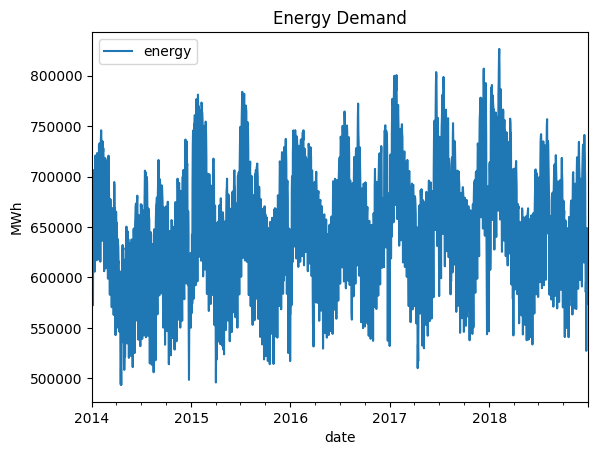

In [52]:
data.plot(title="Energy Demand")
plt.ylabel("MWh")
plt.show()


### Calculating the total no. of entries in the data set 

We are calculating the total no. of entries in our whole dataset which is '1826'. 
1. We used date_range to specify the range including the starting and ending date.

2. Then we calulated the length using len() function

In [53]:
len(pd.date_range(start="2014-01-01", end="2018-12-31"))

1826

### Time related feature Engineering

1. We are extracting many time related data from date index such as Year, Quater, Month,
Week, Day.

2. We are also creating a row index ["ix"] for identifying each row and tracking the order.

3. Next we are calculating Rolling statistics.
we, used this method to smooth out short-term fluctuations and highlighting longer-term trends or patterns.

4. We are plotting the rolling statistics with respect to the linegraph to see the patterns.



<Figure size 2000x1600 with 0 Axes>

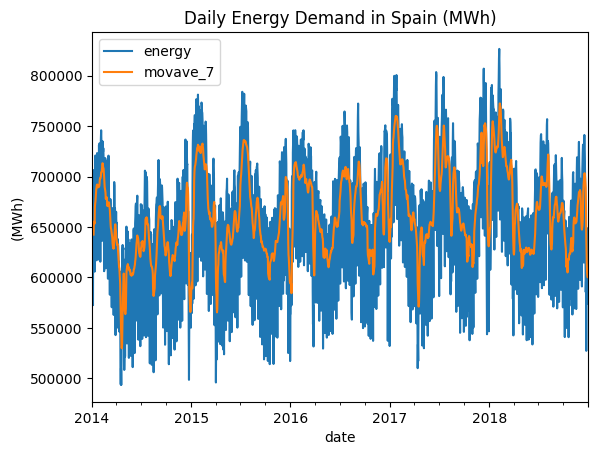

<Figure size 2000x1600 with 0 Axes>

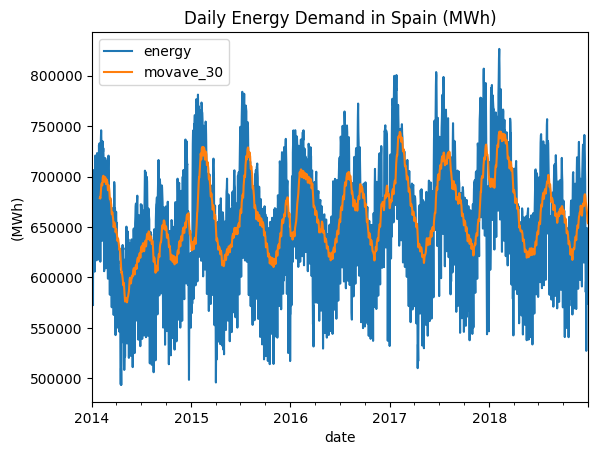

<Figure size 2000x1600 with 0 Axes>

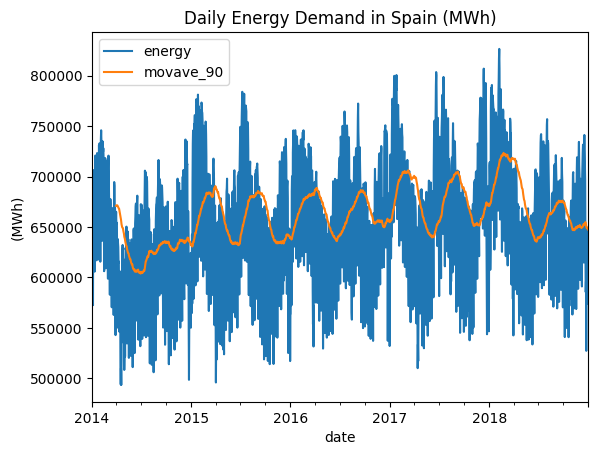

<Figure size 2000x1600 with 0 Axes>

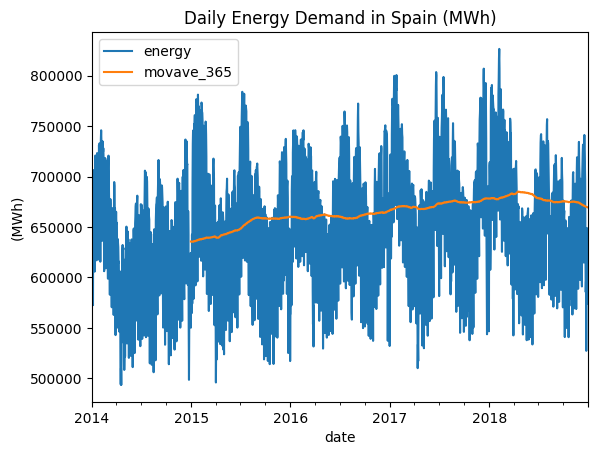

In [54]:
data["year"] = data.index.year
data["qtr"] = data.index.quarter
data["mon"] = data.index.month
data["week"] = data.index.isocalendar().week
data["day"] = data.index.weekday
data["ix"] = range(0,len(data))
data[["movave_7", "movstd_7"]] = data.energy.rolling(7).agg(["mean", "std"])
data[["movave_30", "movstd_30"]] = data.energy.rolling(30).agg(["mean", "std"])
data[["movave_90", "movstd_90"]] = data.energy.rolling(90).agg(["mean", "std"])
data[["movave_365", "movstd_365"]] = data.energy.rolling(365).agg(["mean", "std"])

plt.figure(figsize=(20,16))
data[["energy", "movave_7"]].plot(title="Daily Energy Demand in Spain (MWh)")
plt.ylabel("(MWh)")
plt.show()

plt.figure(figsize=(20,16))
data[["energy", "movave_30"]].plot(title="Daily Energy Demand in Spain (MWh)")
plt.ylabel("(MWh)")
plt.show()

plt.figure(figsize=(20,16))
data[["energy", "movave_90"]].plot(title="Daily Energy Demand in Spain (MWh)")
plt.ylabel("(MWh)")
plt.show()

plt.figure(figsize=(20,16))
data[["energy", "movave_365"]].plot(title="Daily Energy Demand in Spain (MWh)")
plt.ylabel("(MWh)")
plt.show()

##### Result and Analysis :
We can observe that with more number of days, the graph turns out to smooth. Telling us the increasing demand of the energy as per the time.

# EDA: Exploratory Data Analysis
    1. Target Analysis
    2. Votality Analysis
    3. Seasonality and Trend
    
## a] Target Analysis :

    Normality :
    
    Normality refers to the assumption that a set of data follows a normal distribution, also known as a Gaussian distribution or a bell curve. 
                   The normal distribution is a symmetric probability distribution characterized by a bell-shaped curve, where the majority of data points cluster around the mean, and the tails of the distribution extend infinitely in both directions.
                   
                   We are calculating Mean, Standard Deviation, Skewness and Kurtosis to gather information about the datapoints in time-series dataset.
             
           a] Mean : It tells us about the average of the values .
           
           b] Standard Deviation : It tells us about depresion of the values with respect to the mean.
           c] Skewness : It tells us about the measure of asymmetry of the proability distribution graph, in terms of mean, median and mode.
           
           d] Kurtosis : It tells us about the distribution of data points in the tail of the proability distribution graph, it tells us how sharp or flat the peak of a distribution is compared to normal distribution.
           
           e] Shapiro-Wilk Test : It is a statistical Test based upon the null hypothesis
              Null Hypothesis [H0] : The data follows a normal distribution.
              Alternative Hypothesis [H1] :The data doesn't follow a normal distribution.

#### Mean, Standard Deviation, Skewness and Kurtosis

In [55]:
mean = np.mean(data.energy.values)
std = np.std(data.energy.values)
skew = skew(data.energy.values)
ex_kurt = kurtosis(data.energy)
print("Mean: {}\nStandard Deviation: {}".format(mean,std))
print("Skewness: {} \nKurtosis: {}".format(skew, ex_kurt+3))

Mean: 662011.8225205479
Standard Deviation: 62637.57726770914
Skewness: -0.2555279252628293 
Kurtosis: 2.6052606972453667


##### Result and Analysis :
By the above results we can observe that the standard deviation not so close to the mean, indicating that there is much deviation of the datapoints.

We can also observe that ths skewness is negative indicating the distribution tail is streched more towards the left direction.
and Kurtosis is positive indicating Leptokurtic Kurtosis indicating heavy tails telling us more extream values

### Shapiro-Wilk Test : 
It is based on the comparision between the expected value and observed value.
We do it by:

    a] The data is ordered from smallest to largest.
    b] Comaparision between expected and observed value
    c] The test statistics is calculated.
    
The below code:

    1. Defining a function to do sharpiro-wilk test taking arguments data as dataset and alpha as optional significance level .
    
    2. Next, we are performing the test the test is returning stat and pvalue indicating the test statistics and proability value
    i. if pval < 0.05: indicating low pvalue, it suggests that the observed results are unlikely to have occurred by random chance alone under the null hypothesis.This often leads to rejecting the null hypothesis in favor of the alternative hypothesis.
    
    ii. if pval > 0.05: indicating high pvalue, it suggests that the observed results are consistent with what you would expect under the null hypothesis. providing high evidence.

    

In [8]:
def shapiro_test(data, alpha=0.05):
    stat, pval = shapiro(data)
    print("H0: Data was drawn from a Normal Ditribution")
    if (pval<alpha):
        print("pval {} is lower than significance level: {}, therefore null hypothesis is rejected".format(pval, alpha))
    else:
        print("pval {} is higher than significance level: {}, therefore null hypothesis cannot be rejected".format(pval, alpha))
        
shapiro_test(data.energy, alpha=0.05)

H0: Data was drawn from a Normal Ditribution
pval 2.5459379049408426e-10 is lower than significance level: 0.05, therefore null hypothesis is rejected


##### Result and Analysis:
The pval very lower than the signifance level indicating that the null hypothesis is rejected.

### Distribution Plot : 

Histogram :

We have created the distribution plot that provides a visual representation of how the values in the "energy" column are spread across different ranges.
    It helps in identifying the shape of the distribution, whether it resembles a normal distribution or has other characteristics. 
    


Now in the below code:

    1. First of all, we have created a distribution plot using Seaborn's displot.
       data.energy is the column for which the distribution is plotted.
       kde=True adds a kernel density estimate (smoothed line) to the plot.

    2. Sets the title of the plot to "Target Analysis."

    3. Rotated the x-axis labels by 45 degrees for better readability.

    4. Sets the x-axis label to "(MWh)."

    5. We have added a vertical line at the mean (mean) with a red color and a solid line and labels the line with the mean value.

    6. We have added 2 vertical line at two standard deviations in both right and left sides of the plot above the mean with an orange color and a solid line.

   
The plot provides a visual representation of the distribution of the "energy" column, along with key statistical markers such as the mean and two standard deviations. The vertical lines help illustrate the spread of the data around the mean. Adjustments to colors, line styles, and other plot settings can be made based on preferences.


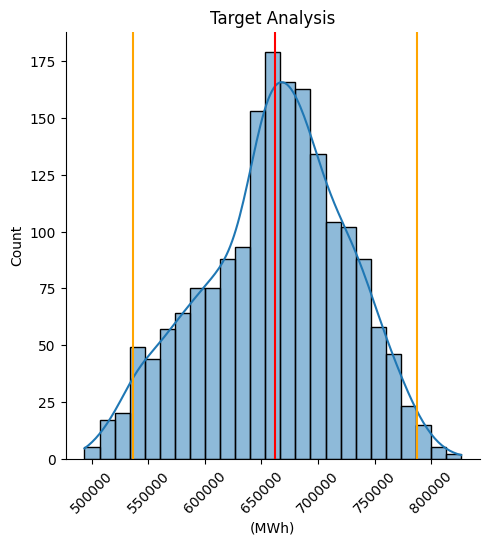

In [9]:
sns.displot(data.energy, kde=True)

plt.title("Target Analysis")
plt.xticks(rotation=45)
plt.xlabel("(MWh)")
plt.axvline(x=mean, color='r', linestyle='-', label="\mu: {0:.2f}%".format(mean))
plt.axvline(x=mean+2*std, color='orange', linestyle='-')
plt.axvline(x=mean-2*std, color='orange', linestyle='-')
plt.show()

##### Result and Analysis : 
    
    The red vertical line represents the mean, and the orange lines indicate two standard deviations from the mean.
    In a normal distribution, approximately 95% of the data falls within two standard deviations of the mean.We checked whether the data falls within this range can be an informal assessment of normality.
    By the above graph we can see both has a small right and left tail that can have the chance of observing extreme values is smaller, comparing to normally distributed data.

## b] Votality Analysis:

Volatility analysis refers to the examination of the variability or dispersion of a set of data points.

#### a] Rolling Quantile:

It refers to the calculation of the quantiles (percentiles) over a rolling or moving window of data 
Example: Median is refered as a 50th quantile , dividing the data into two halves.
So similary we are having 10th quantile, 50th quantile and 90th quantile.

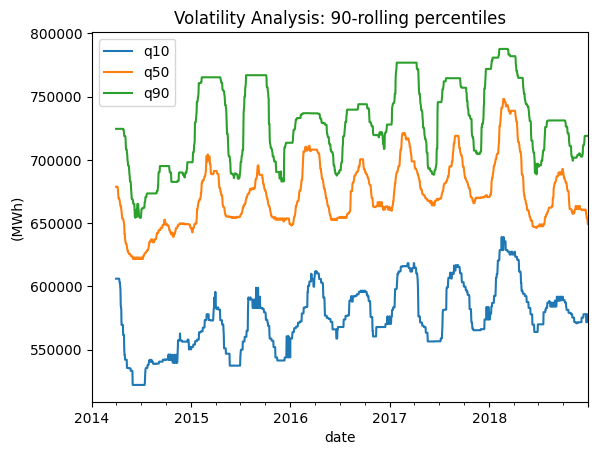

In [10]:
# Insert the rolling quantiles to the monthly returns
data_rolling = data.energy.rolling(window=90)
data['q10'] = data_rolling.quantile(0.1).to_frame("q10")
data['q50'] = data_rolling.quantile(0.5).to_frame("q50")
data['q90'] = data_rolling.quantile(0.9).to_frame("q90")

data[["q10", "q50", "q90"]].plot(title="Volatility Analysis: 90-rolling percentiles")
plt.ylabel("(MWh)")
plt.show()

#####  Result and Analysis : 
By the above graphs we can see that how these patterns smooth out short-term fluctuations and offering insights into the variability and distribution of the data.

#### b] Coefficient Variation :
It is a statistical measure, expressing the relative variability (despersion) of a set of data points in relation to their mean.

CV=(Standard Deviation/ Mean) x 100

Ratio between Standard Deviation and Mean. It gives us in percentage which is used to compare different datasets easily.

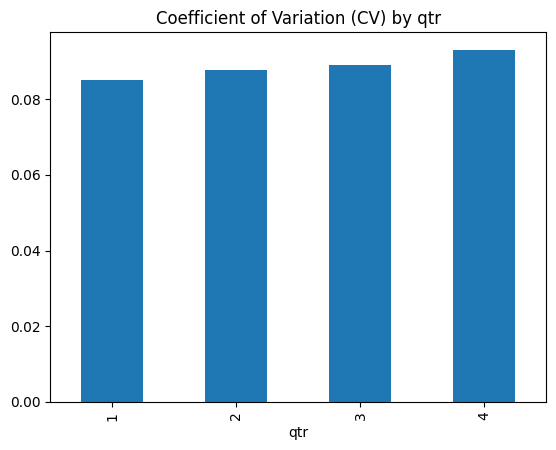

In [11]:
data.groupby("qtr")["energy"].std().divide(data.groupby("qtr")["energy"].mean()).plot(kind="bar")
plt.title("Coefficient of Variation (CV) by qtr")
plt.show()

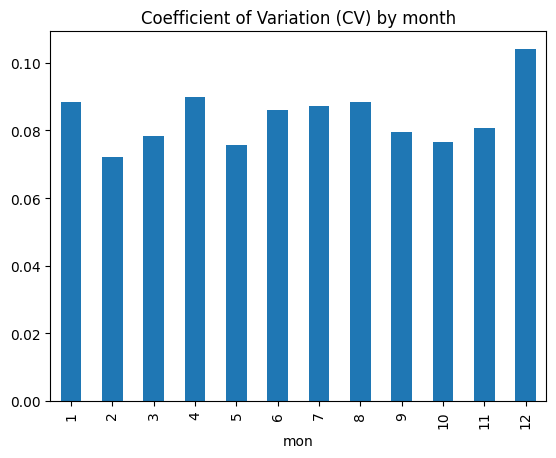

In [12]:
data.groupby("mon")["energy"].std().divide(data.groupby("mon")["energy"].mean()).plot(kind="bar")
plt.title("Coefficient of Variation (CV) by month")
plt.show()

##### Result and Analysis :
By the above graphs we have observed that during winters the energy demand is higher as compared to other months of the year.

#### c] Heteroscedascity Analysis :

This analysis refers to changing variability of time series over time, meaning it tells us about where the variance of errors/ residuals is not constant across all levels of the independent variable. It impact the accuracy and efficiency of the statistical Analysis.


In the below code :

1. We have plotted moving standard deviation of 30 days and 365 days 

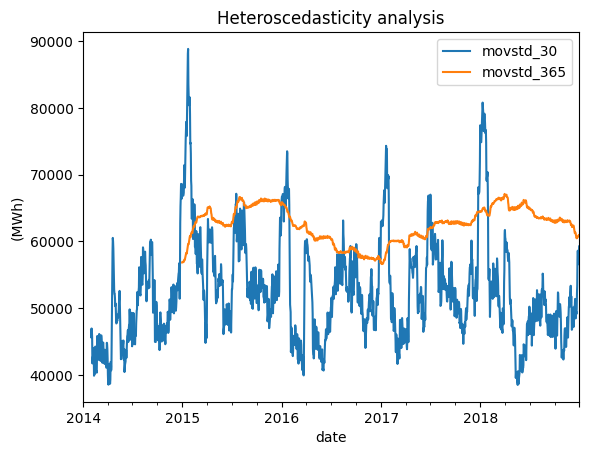

In [13]:
data[["movstd_30", "movstd_365"]].plot(title="Heteroscedasticity analysis")
plt.ylabel("(MWh)")
plt.show()

##### Result and Analysis : 
By the above graphs, we can see variabilty of the time series. And by votality analysis, the short term (quartely and Monthly) volatility is changeable, but in longer term it is quite stable.

### c] Time-Series Analysis: Seasoality and Trend :

i. Line graph:

We have plotted the moving average with respect to the season.
    where,
    
    movave_30: 30-day moving average
    movave_90: 90-day moving average

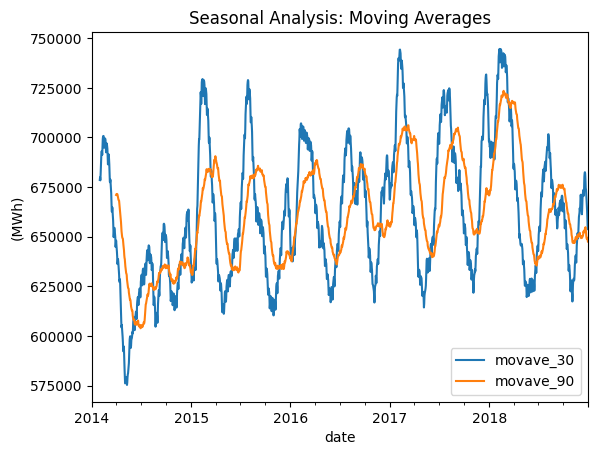

In [14]:
data[["movave_30", "movave_90"]].plot(title="Seasonal Analysis: Moving Averages")
plt.ylabel("(MWh)")
plt.show()

ii. Box plot:
    It is useful for identifying central tendency, spread and potential outliers in each quarter. It shows us the median, quartiles and potential outliers.

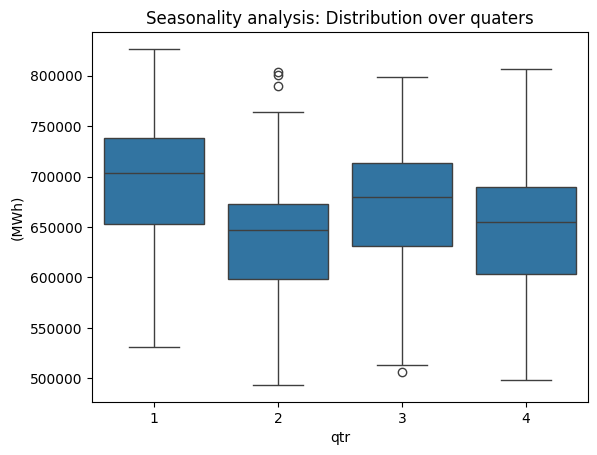

In [15]:
sns.boxplot(data=data, x="qtr", y="energy")
plt.title("Seasonality analysis: Distribution over quaters")
plt.ylabel("(MWh)")
plt.show()

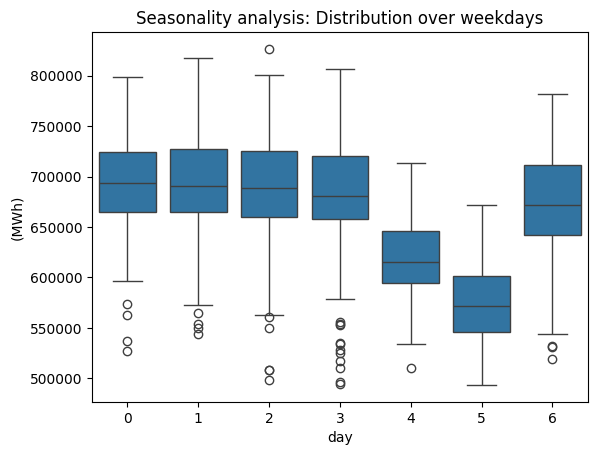

In [16]:
sns.boxplot(data=data, x="day", y="energy")
plt.title("Seasonality analysis: Distribution over weekdays")
plt.ylabel("(MWh)")
plt.show()

So, the result is as expected, we can see there are two clear seasonal pattern in quaterters and weekdays (0 is Monday). By, the graphs. We need to aggregate the daily energy demand data into monthly sums and create a new DataFrame named `data_mon` with the aggregated values. 
	
    1. We need to resamples the daily energy demand data to monthly frequency ("M") and 	aggregates it by summing the values for each month. This results in a new time series 	representing the total energy demand for each month. And convert this aggregated series into dataframe.
    
In summary, we need to transform the original daily energy demand data into a monthly time series by summing the daily values for each month. The resulting `data_mon` DataFrame includes columns for the total energy demand ("energy") and an index column ("ix") representing asequential range of integers. 

In [17]:
data_mon = data.energy.resample("M").agg("sum").to_frame("energy")

data_mon["ix"] = range(0, len(data_mon))
data_mon[:5]

,energy,ix
date,,
2014-01-31,21017412.7,0
2014-02-28,19336398.7,1
2014-03-31,20040978.6,2
2014-04-30,17633177.7,3
2014-05-31,18572681.6,4


iii. Regression Plot:
    
    The regression plot helps visualize the overall trend and direction of the data points, providing insights into whether there is a linear relationship between the sequential range of months and the total monthly energy demand.


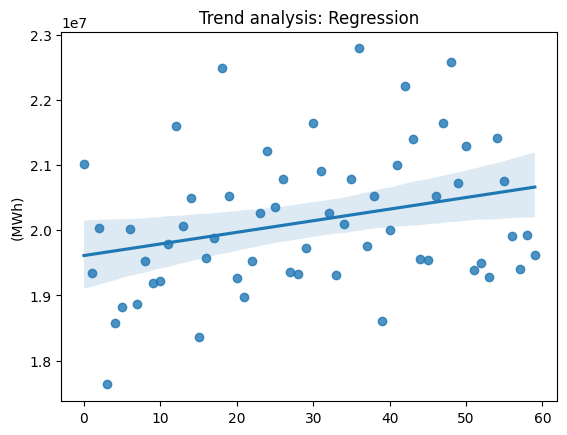

In [18]:
sns.regplot(data=data_mon,x="ix", y="energy")
plt.title("Trend analysis: Regression")
plt.ylabel("(MWh)")
plt.xlabel("")
plt.show()

By the given dataset we have four years: 2014 to 2018, So we have created a Boxplot to visualize the daily distribution of energy demand across different years

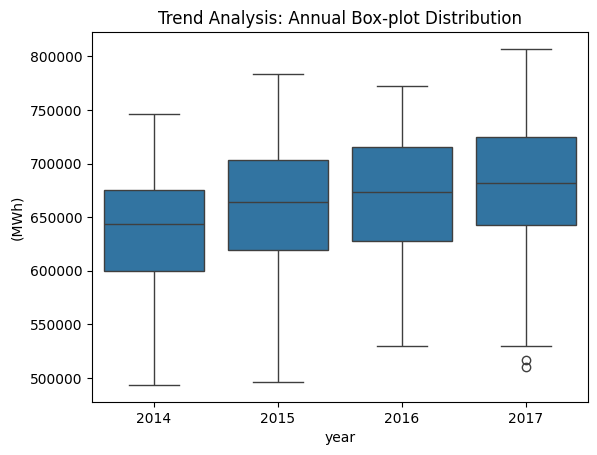

In [19]:
sns.boxplot(data=data["2014":"2017"], x="year", y="energy")
plt.title("Trend Analysis: Annual Box-plot Distribution")
plt.ylabel("(MWh)")
plt.show()

# Feature Engineering : 

The challenge now is to create some features in a very automated way that can deal with seasonality, trend and changes in volatility. The most basic strategy is to use lagged features and rolling window stats, but consider other advanced techniques for further research :

    • Momentum and Mean reversion, like RSI in financial markets  
    • Sequence minning 
    
Data is standardized in order to allow application of models that are sensitive to scale, like neural networks or svm. Now, remembering that distribution shape is maintained, it only changes first and second momentum (mean and standard deviation)

#### a] Distribution Plot (Histogram):
We have created a distribution plot (histogram) of a new variable called "target," which is derived from the "energy" values in the DataFrame .

The target value is calculated subtracting the mean from the energy value and then dividing by the standard deviation.

    target=(mean-energy)/standard_deviation

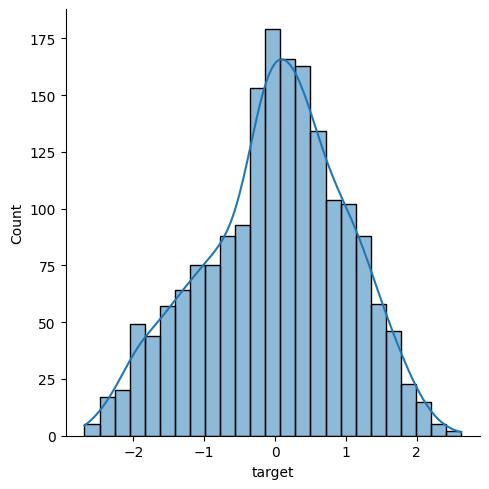

In [20]:
data["target"] = data.energy.add(-mean).div(std)
sns.displot(data["target"], kde=True)
plt.show()

##### Result and Analysis :

The purpose of creating the "target" variable is to standardize the "energy" values by subtracting the mean and dividing by the standard deviation. This transformation often results in a distribution with a mean of 0 and a standard deviation of 1. The distribution plot of the "target" variable allows for visualizing the shape and characteristics of this standardized distribution.

### b] Time-Series Forecasting :

In the below code we have forecasted the time-seies using features and target variable.

1. We have created target variable shifted by 't' variable from 1 to tau.

2. Next, we have created features of this target variable

3. Then, we have calculated the Moving Average,Standard Deviation, Minimum and Maximum features of [7,14,30] 

4. Then the code uses one-hot encoding to create binary columns for months and days.

5. Then features list is updated to include lagged features, moving average features, and one-hot encoded columns for months and days.

In [21]:
features = []
corr_features=[]
targets = []
tau = 30 #forecasting periods

for t in range(1, tau+1):
    data["target_t" + str(t)] = data.target.shift(-t)
    targets.append("target_t" + str(t))
    
for t in range(1,31):
    data["feat_ar" + str(t)] = data.target.shift(t)
    #data["feat_ar" + str(t) + "_lag1y"] = data.target.shift(350)
    features.append("feat_ar" + str(t))
    #corr_features.append("feat_ar" + str(t))
    #features.append("feat_ar" + str(t) + "_lag1y")
        
    
for t in [7, 14, 30]:
    data[["feat_movave" + str(t), "feat_movstd" + str(t), "feat_movmin" + str(t) ,"feat_movmax" + str(t)]] = data.energy.rolling(t).agg(["mean", "std", "min", "max"])
    features.append("feat_movave" + str(t))
    #corr_features.append("feat_movave" + str(t))
    features.append("feat_movstd" + str(t))
    features.append("feat_movmin" + str(t))
    features.append("feat_movmax" + str(t))
    
months = pd.get_dummies(data.mon,
                              prefix="mon",
                              drop_first=True)
months.index = data.index
data = pd.concat([data, months], axis=1)

days = pd.get_dummies(data.day,
                              prefix="day",
                              drop_first=True)
days.index = data.index
data = pd.concat([data, days], axis=1)


features = features + months.columns.values.tolist() + days.columns.values.tolist()

##### Result and Analysis:
By using features and target variable we can forecast the time series data.

Features are : 

    a. "feat_ar1" to "feat_ar7": 
    Lagged versions of the target variable, representing its values at different time lags.

    b. Moving Average Features:

    "feat_movave7": 7-day moving average of the "energy" column.
    "feat_movave14": 14-day moving average of the "energy" column.
    "feat_movave30": 30-day moving average of the "energy" column.

#### a] Correlation Matrix :
This Matrix is used to show correlation between the variables.

This selection of features is used for correlation analysis to understand the relationships between different time-shifted values and the target variable. It helps us to identify potential patterns or dependencies that can be valuable for building predictive models.

It will show us the correlation coefficients between the selected features. such as:

    a. Positive correlations indicate a positive linear relationship.
    b. Negative correlations indicate a negative linear relationship, 
    c. No-linear Relationship :  values that are  close to zero suggest a weak or no linear relationship.

So, we have created a list named corr_features that includes specific lagged features ("feat_ar1" to "feat_ar7") and moving average features ("feat_movave7", "feat_movave14", "feat_movave30") that we want to use for correlation analysis. 

In [22]:
corr_features = ["feat_ar1", "feat_ar2", "feat_ar3", "feat_ar4", "feat_ar5", "feat_ar6", "feat_ar7", "feat_movave7", "feat_movave14", "feat_movave30"]

The Below code, 

1. It is computing a Pearson Correlation matrix  between the target variable "target_t1" and the features listed in corr_features.

2. Then, we are identifying the top5 most correlated features using sorting.

3. We are plotting the heatmap and adding numeric value to each cell using argument annot=True.

4. Ensuring the plot area fits tightly the plot.

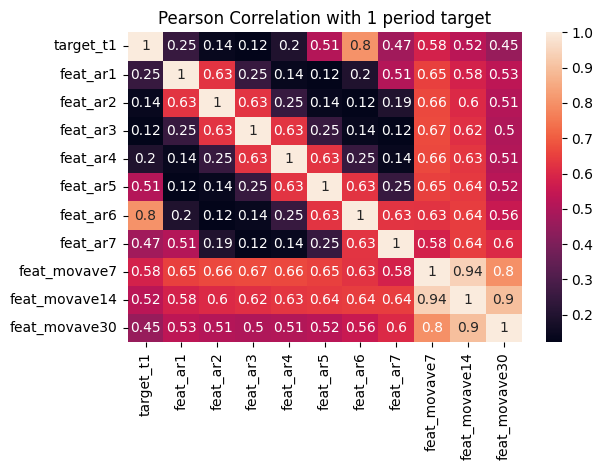

In [23]:
corr = data[["target_t1"] + corr_features].corr()

top5_mostCorrFeats = corr["target_t1"].apply(abs).sort_values(ascending=False).index.values[:6]


# Plot heatmap of correlation matrix
sns.heatmap(corr, annot=True)
plt.title("Pearson Correlation with 1 period target")
plt.yticks(rotation=0); plt.xticks(rotation=90)  # fix ticklabel directions
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()  # show the plot

#### b] Pair Plot : 

A pair plot is a graphical representation used in exploratory data analysis (EDA) to visualize relationships between pairs of variables in a dataset. It is particularly useful when dealing with multiple variables, allowing us to quickly identify patterns, trends, and potential relationships. Pair plots are often created using libraries like Seaborn or matplotlib in Python.

The below code is plotting a pair plot of most 5 Correlated Features using regression plot.

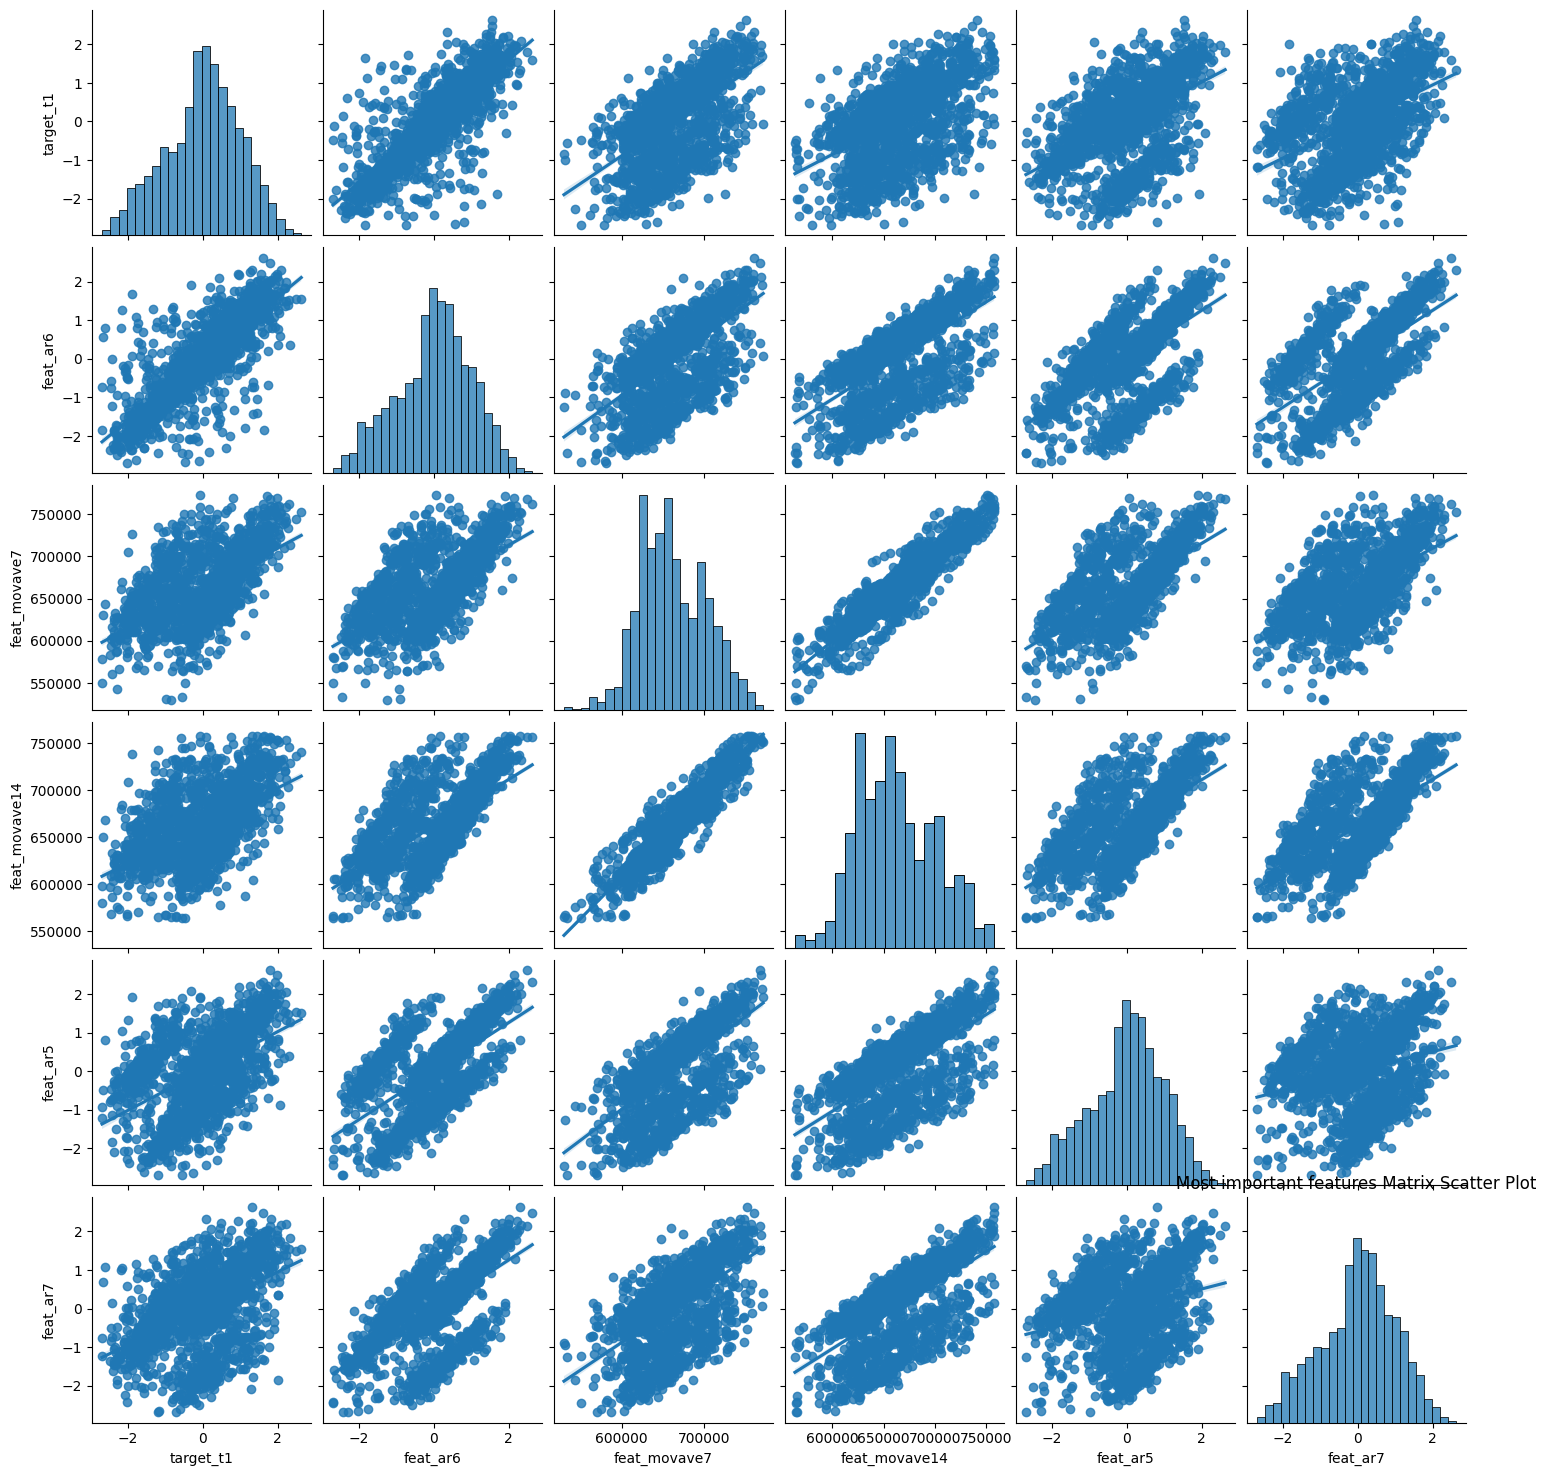

In [24]:
sns.pairplot(data=data[top5_mostCorrFeats].dropna(), kind="reg")
plt.title("Most important features Matrix Scatter Plot")
plt.show()

##### Result and analysis : 

By the plot it provides a grid of scatterplots for each pair of variables in the dataset, allowing us to visually inspect the relationships between them.

Scatterplots can reveal linear or non-linear patterns, clusters, or outliers.

It shows us the correlation assessment:

    The diagonal of a pair plot typically shows histograms or kernel density estimates for each individual variable. This allows you to assess the distribution of each variable and identify potential outliers.
    
    Off-diagonal scatterplots can help identify the strength and direction of the correlation between pairs of variables. Points concentrated along a line suggest a strong linear relationship.
    
Identifying Outliers:

    Outliers can be easily identified in pair plots, as they often appear as points that deviate from the general pattern of the scatterplots.
    
Multivariate Insights:

    Pair plots are particularly useful when dealing with multiple variables simultaneously. They provide a comprehensive view of how variables interact with each other.
    
    By color-coding or marking points based on a categorical variable, you can explore the relationships within subgroups of your data

In [25]:
data_feateng = data[features + targets].dropna()
nobs= len(data_feateng)
print("Number of observations: ", nobs)


Number of observations:  1765


In the above code,
1. We have created a created a new DataFrame named data_feateng that includes selected features and target variables while excluding any rows with missing values (dropna()). 

2. The resulting data_feateng DataFrame is presumably used for further analysis, such as building a predictive model. The number of observations (nobs) gives you an idea of the size of the dataset after handling missing values. It's a crucial step to ensure that you have enough data to train and evaluate your model effectively.

# Model Building : 
In this step, two candidates models are build using an nice feature in Scikit-Learn such us MultiOutput Regression, it provides a framework to automatically and easily fit models to predict several target variables. 
First a baseline model (linear regression) will be fit and compared to a more advanced model, like Random Forest. A linear model does not need hyperparamenter tunning, and there is some correlation in data, so it is a strongh foundation, but there are several caveats:


    • Target variable is not perfectly normally distributed with constant variance 
    • There are a lot of multicollinearity among predictors 
    • Observations are not independent
    
On the other hand an advanced model, like Random Forest, needs to perform hyperparamenter tunning, typically it is solved by using GridSearch and Cross Validation, but time series data is not suitable to be used in CV, because data is shuffled in order to build k-folds. On the other hand, Scikit-Learng provide us with a nice solution:

TimeSeries Splits, that respect time structure of date and iterativelly allow us to perform GridSearch.

#### 1. Cleaning of data : 
To select a subset of features and target variables from the DataFrame `data` and drops any rows containing missing values. 
	1. Selects columns corresponding to the features and target variables defined earlier.
	2. We have used dropna() method to remove any rows in the resulting DataFrame that 	contain missing values.

#### 2. Split Data :
Data points in 2018 are used as a holdout data to perform a honest assessment of model performance and carry out some residual analysis (6 months).

Now, we need to split the dataset into training and testing sets for a time series forecasting problem. 
	Splitting Features and Targets :
   		a. Selects the training set features from the DataFrame `data_feateng` for the years 		2014 to 2017.
		b. Selects the corresponding training set target variables.
		c. Selects the testing set features for the year 2018.
   		d. Selects the corresponding testing set target variables.


Total number of observations:  1765
Train: (1431, 59)(1431, 30), 
Test: (334, 59)(334, 30)


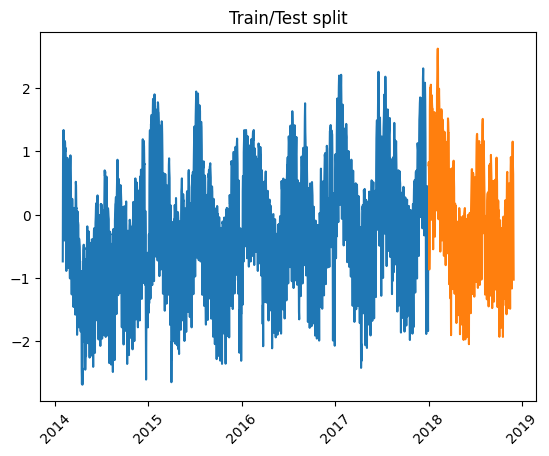

In [26]:
X_train = data_feateng.loc["2014":"2017"][features]
y_train = data_feateng.loc["2014":"2017"][targets]

X_test = data_feateng.loc["2018"][features]
y_test = data_feateng.loc["2018"][targets]

n, k = X_train.shape
print("Total number of observations: ", nobs)
print("Train: {}{}, \nTest: {}{}".format(X_train.shape, y_train.shape,
                                              X_test.shape, y_test.shape))

plt.plot(y_train.index, y_train.target_t1.values, label="train")
plt.plot(y_test.index, y_test.target_t1.values, label="test")
plt.title("Train/Test split")
plt.xticks(rotation=45)
plt.show()

##### Result and Analysis :
This graph helps visualize the temporal split between the training and testing sets, which is crucial in time series forecasting to maintain the temporal order of the data. The plot displays the values of the target variable "target_t1" over time for both the training and testing sets.

#### Baseline Model : Linear Regression :

We need to create a linear regression model using scikit-learn's ‘LinearRegression’ to predict the target variable "target_t1" based on the training set features (`X_train`). It then evaluates the performance of the model on both the training and testing sets using the root mean squared error (RMSE).

	1. Now, we need to import the Linear Regression model and mean squared error metric from 	scikit-learn library.
 	2. Creates and fits a linear regression model using the training set features (`X_train`) and 	target variable ("target_t1").
	3. Making Predictions :
  		a. Predicts the target variable for the training set. : reg.predict(X_train)
  		b. Predicts the target variable for the testing set. : reg.predict(X_test):
	4. Calculating RMSE (Root Mean Square Error):
   		a. We need to calculate the root mean squared error for the training set predictions.
   		b. We also need to calculates the root mean squared error for the testing set 			predictions.
        
The RMSE is a measure of the model's accuracy, and a lower RMSE indicates better performance. RMSE helps assess how well the linear regression model generalizes to new, unseen data.


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression().fit(X_train, y_train["target_t1"])
p_train = reg.predict(X_train)
p_test = reg.predict(X_test)

RMSE_train = np.sqrt(mean_squared_error(y_train["target_t1"], p_train))
RMSE_test = np.sqrt(mean_squared_error(y_test["target_t1"], p_test))

print("Train RMSE: {}\nTest RMSE: {}".format(RMSE_train, RMSE_test) )

Train RMSE: 0.33298000709497866
Test RMSE: 0.2770515988402264


#### Training a Random Forest with Time Series Split to tune Hyperparameters :

TimeSeriesSplit framework is shown, on each fold, train data is closer to the beginning of forecasting period
	1. Time Series Split: 
	By using scikit-learn's `TimeSeriesSplit` to perform time series cross-validation. It 		prints the indices for training and validation sets for each fold and plots the 			corresponding target variable "target_t1" for both the training and validation sets. 
			
        i. We need to import the ‘TimeSeriesSplit’ class from scikit-learn for time 			series cross-validation and ‘ParameterGrid’ for grid search.
			
        ii. Time Series Cross-Validation : Initializes a time series cross-validator with 			3 splits (`n_splits`) and a maximum training set size of 365*2.
		
        iii. Iterates over the training and validation indices for each fold.
    				a. Prints the size of the training and testing sets for each fold.
      				b. Plots the target variable "target_t1" for the training set.
      				c. Plots the target variable "target_t1" for the validation set.

TRAIN: 360 TEST: 357


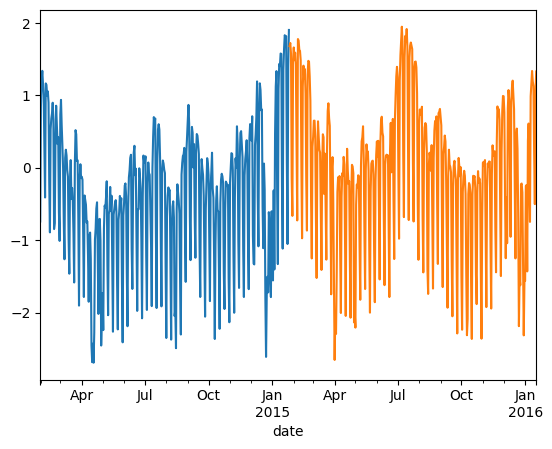

TRAIN: 717 TEST: 357


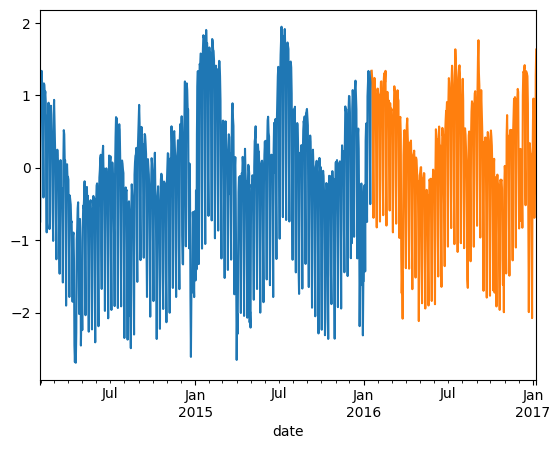

TRAIN: 730 TEST: 357


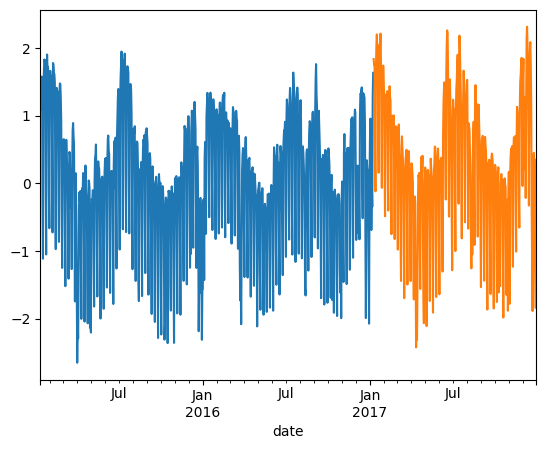

In [28]:
from sklearn.model_selection import TimeSeriesSplit, ParameterGrid

splits = TimeSeriesSplit(n_splits=3, max_train_size=365*2)
for train_index, val_index in splits.split(X_train):
    print("TRAIN:", len(train_index), "TEST:", len(val_index))
    y_train["target_t1"].iloc[train_index].plot()
    y_train["target_t1"].iloc[val_index].plot()

    plt.show()
   

##### Result and Analysis :

This graph provides a visual representation of how the training and validation sets change in each fold of the time series cross-validation. It helps to observe how the model is trained and validated over time, considering the temporal order of the data.

#### RandomForestRegressor:
	1. Time series cross-validation with a random forest regressor. 
We need define a function to perform time series cross-validation with a random forest regressor. It then applies this function to train and evaluate the model on different folds.

		a. We have to imports the Random Forest Regressor from scikit-learn.
		b. We need to specify a grid of hyperparameters for the random forest regressor, 			including the number of estimators (`n_estimators`), maximum depth (`max_depth`), 		maximum features (`max_features`), and random state (`random_state`).
		c. We need to create a parameter grid using `ParameterGrid` to explore different 			combinations of hyperparameters.
		d. Time Series Cross-Validation Function : We need a function that performs time 		series cross-validation for a given model, hyperparameter grid, splits, and training 		data. It prints and returns training and validation root mean squared error (RMSE) 		scores for each fold, along with the best hyperparameters.
		e. Applying the Function :
        We have to apply the time series cross-validation function to train and evaluate the random forest regressor on different folds. 

In [29]:
from sklearn.ensemble import RandomForestRegressor

splits = TimeSeriesSplit(n_splits=3, max_train_size=365*2)
rfr = RandomForestRegressor()
# Create a dictionary of hyperparameters to search
rfr_grid = {"n_estimators": [500], 
        'max_depth': [3, 5, 10, 20, 30], 
        'max_features': [4, 8, 16, 32, 59], 
        'random_state': [123]}
rfr_paramGrid = ParameterGrid(rfr_grid)

def TimeSplit_ModBuild(model, paramGrid, splits, X, y):
    from sklearn.model_selection import TimeSeriesSplit
    from sklearn.metrics import mean_squared_error

    #Loop over each time split and for each
    for train_index, val_index in splits.split(X_train):
        _X_train_ = X.iloc[train_index]
        _y_train_ = y.iloc[train_index]
        _X_val_ = X.iloc[val_index]
        _y_val_ = y.iloc[val_index]

        train_scores = []
        val_scores = []
        #models = []
        
        # Loop through the parameter grid, set the hyperparameters, and save the scores
        for g in paramGrid:
            model.set_params(**g)
            model.fit(_X_train_, _y_train_)
            p_train = model.predict(_X_train_)
            p_val = model.predict(_X_val_)
            score_train = np.mean(mean_squared_error(_y_train_, p_train))
            score_val = np.mean(mean_squared_error(_y_val_, p_val))
            train_scores.append(score_train)
            val_scores.append(score_val)
            #models.append(model)
            best_idx = np.argmin(val_scores)
            
        print("Best-Fold HyperParams:: ", paramGrid[best_idx])
        print("Best-Fold Train RMSE: ", train_scores[best_idx])
        print("Best-Fold Val RMSE: ",val_scores[best_idx])
        print("\n")
        
    #Return most recent model
    return train_scores, val_scores, best_idx


CV_rfr_tup = TimeSplit_ModBuild(rfr, rfr_paramGrid, splits, X_train, y_train["target_t1"])

Best-Fold HyperParams::  {'random_state': 123, 'n_estimators': 500, 'max_features': 32, 'max_depth': 30}
Best-Fold Train RMSE:  0.027095961075854748
Best-Fold Val RMSE:  0.20927828234691428


Best-Fold HyperParams::  {'random_state': 123, 'n_estimators': 500, 'max_features': 8, 'max_depth': 20}
Best-Fold Train RMSE:  0.023568612095463817
Best-Fold Val RMSE:  0.18827194264653954


Best-Fold HyperParams::  {'random_state': 123, 'n_estimators': 500, 'max_features': 16, 'max_depth': 10}
Best-Fold Train RMSE:  0.02797004609059325
Best-Fold Val RMSE:  0.21600766614625375




In [30]:
best_rfr_idx = CV_rfr_tup[2]
best_rfr_grid = rfr_paramGrid[best_rfr_idx]
best_rfr = RandomForestRegressor().set_params(**best_rfr_grid).\
    fit(X_train.loc["2016":"2017"], y_train.loc["2016":"2017", "target_t1"])

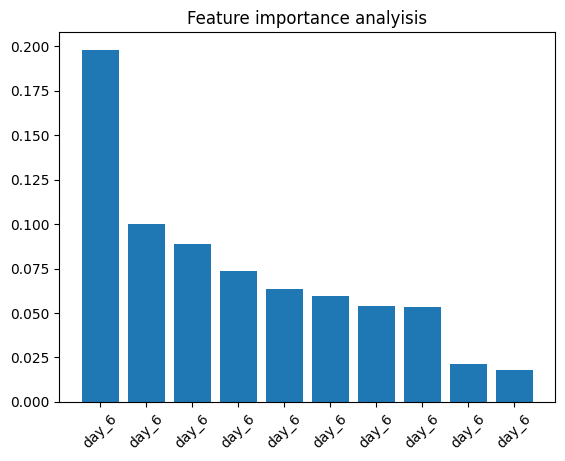

In [31]:
# Get feature importances from our random forest model
importances = best_rfr.feature_importances_

# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
sorted_index_top = sorted_index[:10]
x = range(len(sorted_index_top))

# Create tick labels 
labels = np.array(features)[58]
plt.bar(x, importances[sorted_index_top], tick_label=labels)
plt.title("Feature importance analyisis")
# Rotate tick labels to vertical
plt.xticks(rotation=45)
plt.show()

In [32]:
p_train = best_rfr.predict(X_train)
train_resid_1step = y_train["target_t1"]- p_train

p_test = best_rfr.predict(X_test)
test_resid_1step = y_test["target_t1"]- p_test

In [33]:
test_df = y_test[["target_t1"]]*std+mean
test_df["pred_t1"] = p_test*std+mean
test_df["resid_t1"] = test_df["target_t1"].add(-test_df["pred_t1"])
test_df["abs_resid_t1"] = abs(test_df["resid_t1"])
test_df["ape_t1"] = test_df["resid_t1"].div(test_df["target_t1"])

test_MAPE = test_df["ape_t1"].mean()*100
print("1-period ahead forecasting MAPE: ", test_MAPE)


1-period ahead forecasting MAPE:  0.0949638141574298


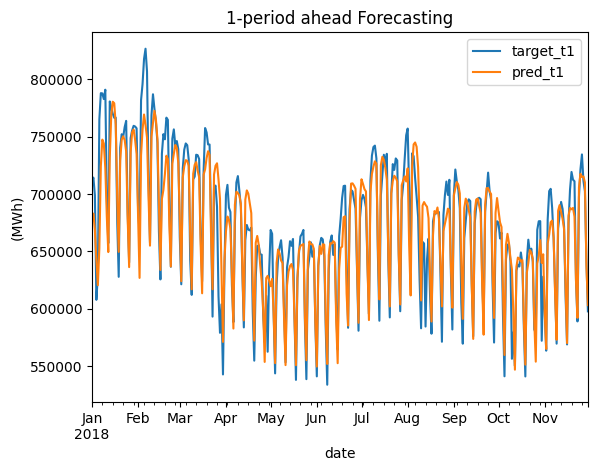

In [34]:
test_df[["target_t1", "pred_t1"]].plot()

plt.title("1-period ahead Forecasting")
plt.ylabel("(MWh)")
plt.legend()
plt.show()

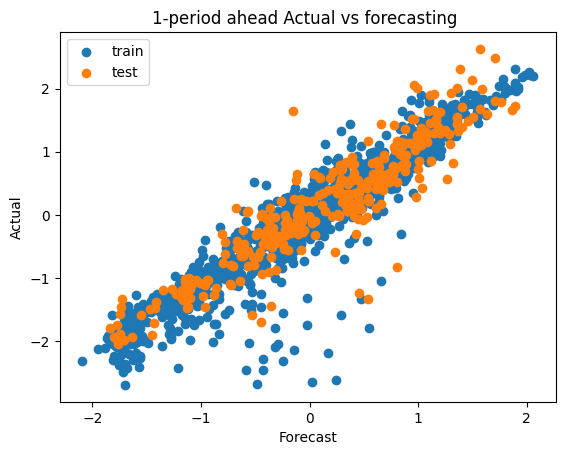

In [35]:
plt.scatter(y=y_train["target_t1"],x=p_train, label="train")
plt.scatter(y=y_test["target_t1"],x=p_test, label="test")
plt.title("1-period ahead Actual vs forecasting ")
plt.ylabel("Actual")
plt.xlabel("Forecast")
plt.legend()
plt.show()

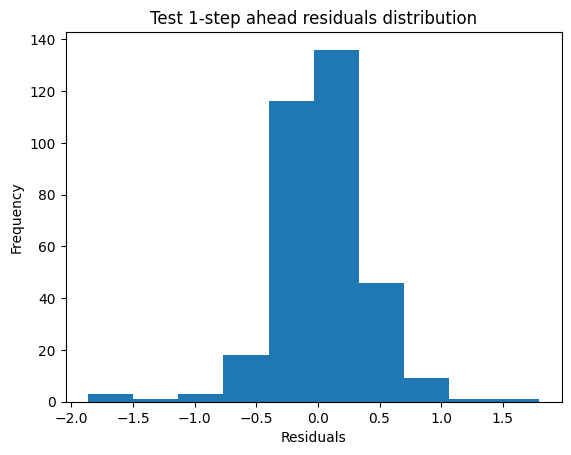

In [36]:
test_resid_1step.plot.hist(bins=10, title="Test 1-step ahead residuals distribution")
plt.xlabel("Residuals")
plt.show()


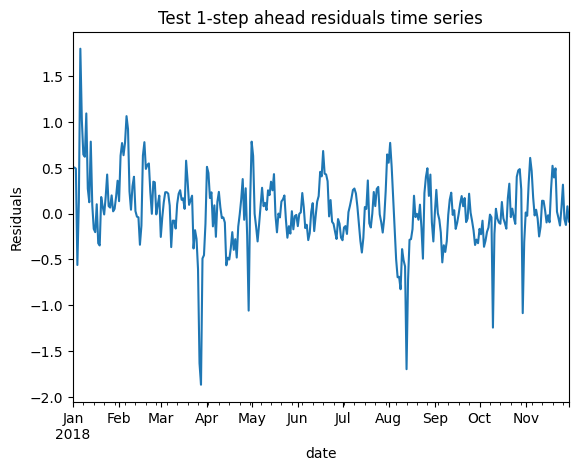

In [37]:
test_resid_1step.plot(title="Test 1-step ahead residuals time series")
plt.ylabel("Residuals")
plt.show()


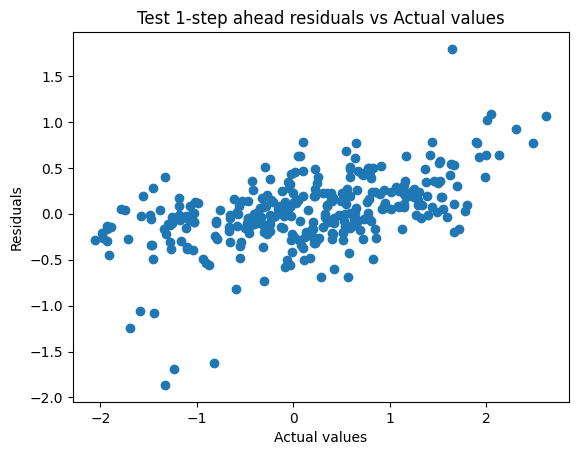

In [38]:
plt.scatter(x=y_test["target_t1"].values, y=test_resid_1step.values)
plt.title("Test 1-step ahead residuals vs Actual values")
plt.ylabel("Residuals")
plt.xlabel("Actual values")
plt.show()

In [39]:
multi_rfr = RandomForestRegressor().set_params(**best_rfr_grid).\
    fit(X_train.loc["2016":"2017"], y_train.loc["2016":"2017"])

In [40]:
p_train = multi_rfr.predict(X_train)
train_resid_1step = y_train- p_train

p_test = multi_rfr.predict(X_test)
test_resid_1step = y_test- p_test


# MAPE TEST:

In [41]:
periods = [1, 7, 14, 30]

ytest_df = y_test*std+mean
ptest_df = pd.DataFrame(data=p_test*std+mean, index=test_df.index, columns=["pred_t" + str(i) for i in range(1, 31)])
test_df = pd.concat([ytest_df, ptest_df], axis=1)

test_MAPE = []

for t in periods:
    test_df["resid_t" + str(t)] = test_df["target_t" + str(t)].add(-test_df["pred_t" + str(t)])
    test_df["abs_resid_t" + str(t)] = abs(test_df["resid_t" + str(t)])
    test_df["ape_t" + str(t)] = test_df["abs_resid_t" + str(t)].div(test_df["target_t" + str(t)])
    test_MAPE.append(round(test_df["ape_t" + str(t)].mean(), 4)*100)

print("MAPE test: ", test_MAPE)

MAPE test:  [2.67, 3.6900000000000004, 3.7800000000000002, 4.2]


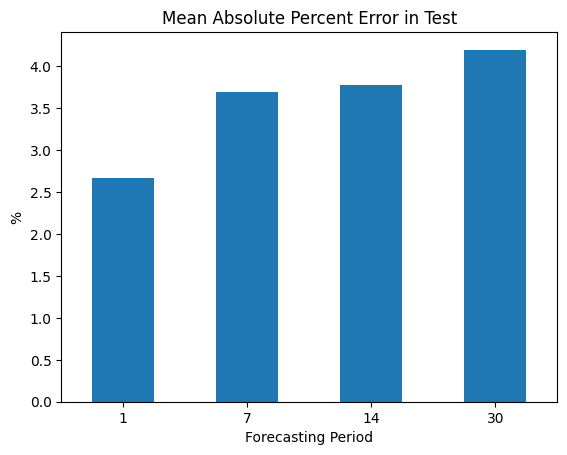

In [42]:
mape_df = pd.DataFrame(index=periods, data={"test_MAPE": test_MAPE})
mape_df.plot(kind="bar", legend=False)
plt.title("Mean Absolute Percent Error in Test")
plt.xlabel("Forecasting Period")
plt.ylabel("%")
plt.xticks(rotation=0)
plt.show()

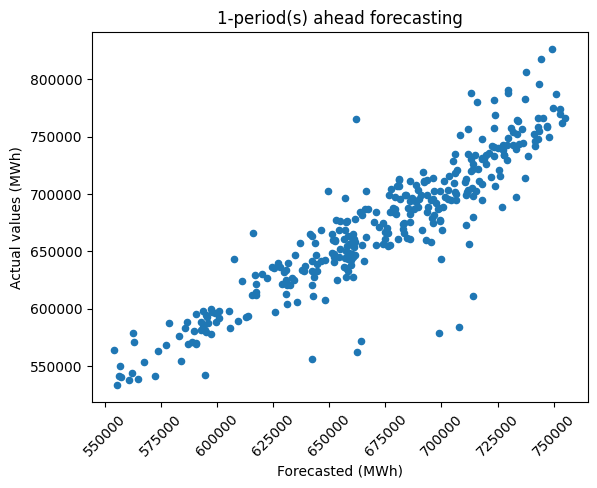

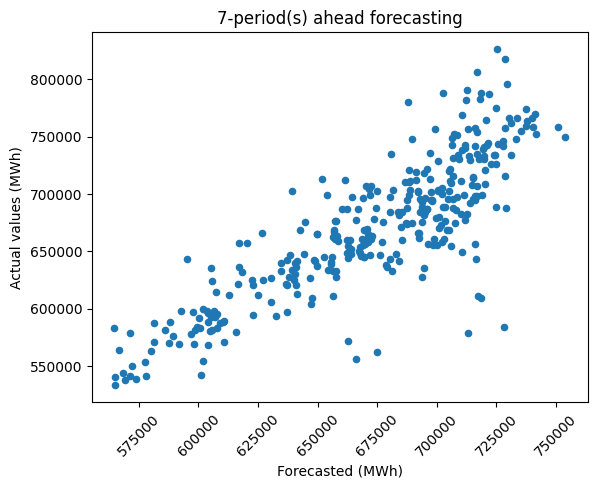

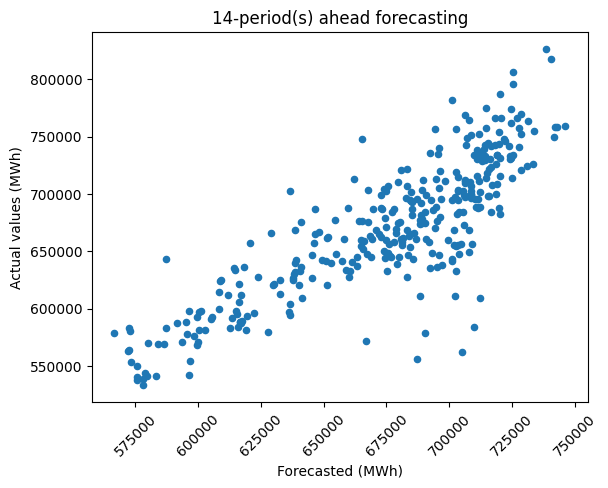

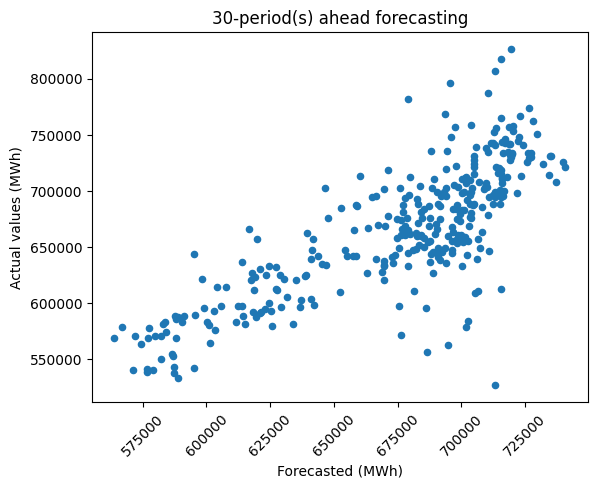

In [43]:
#f, ax = plt.subplots(nrows=3,ncols=2)
for t in periods:
    test_df[["target_t" + str(t), "pred_t" + str(t)]].plot(x="pred_t" + str(t), y="target_t" + str(t) ,kind="scatter")
    plt.title("{}-period(s) ahead forecasting".format(t))
    plt.xlabel("Forecasted (MWh)")
    plt.ylabel("Actual values (MWh)")
    plt.xticks(rotation=45)
    plt.show()

In [44]:
test_df.index = test_df.index.date

The, We have created a forecast_range using the pd.date_range function in Python's pandas library. The forecast_range is constructed based on the maximum date in the test_df index and spans a specified number of periods (tau) with a daily frequency.

In [45]:
forecast_range = pd.date_range(start=np.max(test_df.index.values), periods=tau, freq="D")
len(forecast_range)

30

So, we are generating a forecast using a model's predictions (p_test) and the standard deviation (std) and mean (mean) of the target variable. The forecast is calculated for each period within the range specified by tau.

In [46]:
forecast = []
for t in range(0, tau):
    #print(-(t+1), (t))
    forecast = p_test[-(t+1):,(t)]*std+mean

At last, we have created a plot to visualize the actual values of "target_t1" in the test data, along with predicted values ("pred_t1") and a forecasting line. 

In the below code,

1. We have plotted the Actual Values.

2. Then, Scatter Plot for Predicted Values.

3. Line Plot for Forecasting.

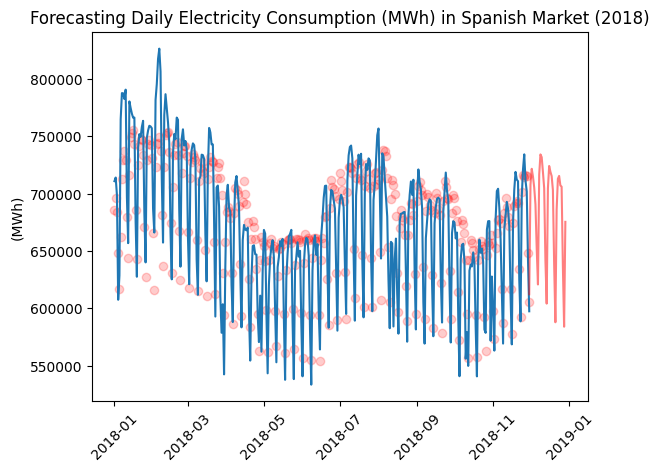

In [47]:
test_df["target_t1"].plot()
plt.scatter(x=test_df.index, y=test_df["pred_t1"], c="r", alpha=0.2, label="test preds")
plt.plot(forecast_range, forecast, c="r", alpha=0.5, label="forecasting")
plt.ylabel("(MWh)")
plt.xticks(rotation=45)#for better readability
plt.title("Forecasting Daily Electricity Consumption (MWh) in Spanish Market (2018)")
plt.show()